<h1 align="center">Previsões com Médias Móveis e Modelos Autoregressivos</h1>
<p align="center"><img src=https://economia.culturamix.com/blog/wp-content/gallery/medias-moveis-para-mini-indice-2/M%C3%A9dias-M%C3%B3veis-Para-Mini-%C3%8Dndice-2.png></p>

<p align="justify">As Médias Móveis, Modelos Autoregressivos e os modelos derivados destes dois, tais como, ARMA, ARIMA, VAR, GAR, dentre outros, são amplamente utilizados nos estudos das Séries Temporais voltadas para a Estatística e Econometria. Embora esses modelos sejam os mais utilizados para a execução de tarefas nas Séries Temporais, muitos outros modelos surgiram e se mostraram mais competitivos ou até superando o desempenhos destes que foram apresentados, conhecidos como "Modelos Clássicos". A principal biblioteca para implementarmos esses modelos será a <i>statsmodels</i>.</p>

<h2>Os Modelos Clássicos</h2>
<p align="justify">Vale relembrar que muitas Séries Temporais apresentam tendências e sazonalidades, enquanto outros modelos assumem as características estácionárias. Se uma Série Temporal é estacionária, a <b>média</b> e o <b>desvio padrão</b> permanece constante ao longo do período. Dessa forma, a Série Temporal não apresenta tendência e nenhum ciclo de variabilidade.</p>
<p align="justify">A remoção de componentes irregulares (tendências e flutuações sazonais) é um aspecto intrínseco da aplicação desses modelos. Os modelos então prevêem o que sobrou após remover a sazonalidade e a tendência. A maioria das abordagens são funcionais apenas em Séries Temporais univariadas, ou seja, com um único vetor ou um único valor que se altera ao longo do tempo. Embora haja extensões propostas para Séries Temporais multivariadas, elas não são tão populares quanto para as versões univaridadas.</p>
<p align="justify">Outro aspecto importante dos modelos clássicos são lineares, o que significa que eles assumes a lineraridade nas relações entre os valores e em diferentes passos de tempo. Na prática, a maioria dos modelos funcionam bem em uma Série Temporal estacionária. Com base nisso, a aplicação de modelos está restrita as Séries Temporais que possuem a característica de estacionariedade. Os métodos estatísticos para análise e previsão de Séries Temporais não lineares não possui destaque, no entanto, existem alguns modelos, tais como o Modelo Autoregressivo de Limiar, que pode ser utilizado.</p>
<p align="justify">No mundo real, as Séries Temporais vêm de processos complicados que podem não ser lineares e não estacionário. Existem mais de uma forma de descrevê-los, cada qual com seus prós e contras. Atualemnte, modelos não lineares possuem uma linha de pesquisa diferente, ou seja, as redes neurais ou o campo mais amplo da apredizagem de máquina.</p>


<h2>A biblioteca <i>Statsmodels</i></h2>
<p align='center'>
	<table border="1">
	 <caption>Classes mais importantes do <i>statsmodels</i></caption>
	<tr>
	<th align='center'>Classe</td>
	<th align='center'>Descrição</td>
	</tr>
	<tr>
	<td>ar_model.AutoReg</td>
	<td>Modelo de Autoregressão Univariada</td>
	</tr>
	<tr>
	<td>arima.model.ARIMA</td>
	<td>Autoregressive Integrated Moving Average (ARIMA)
model</td>
	</tr>
	<tr>
	<td>ExponentialSmoothing</td>
	<td>Holt Winter's Exponential Smoothing</td>
	</tr>
	<tr>
	<td>SimpleExpSmoothing</td>
	<td>Simple Exponential Smoothing</td>
	</tr>
</table></p>

<p align="justify">A Classe ARIMA também têm a funcionalidade para SARIMA, por meio do parâmetro <i>seasonal_order</i>. Por definição, ARIMA suporta a Média Movel e o Modelo Autoregressivo. Segue algumas funções úteis aqui:</p>
<p></p>

<table border="1">
	<caption>Funções Úteis no <i>statsmodels</i></caption>
	<tr>
	<th align='center'>Função</td>
	<th align='center'>Descrição</td>
	</tr>
	<tr>
	<td>stattools.kpss</td>
	<td>Kwiatkowski-Phillips-Schmidt-Shin test for stationarity</td>
	</tr>
	<tr>
	<td>stattools.adfuller</td>
	<td>Augmented Dickey-Fuller unit root test</td>
	</tr>
	<tr>
	<td>stattools.ccf</td>
	<td>The cross-correlation function</td>
	</tr>
	<tr>
	<td>stattools.pacf</td>
	<td>Partial autocorrelation estimate</td>
	</tr>
	<tr>
	<td>stats.diagnostic.het_arch</td>
	<td>Engle's Test for Autoregressive Conditional Heteroscedasticity (ARCH), also referred to as the ARCH-LM test</td>
	</tr>
	<tr>
	<td>stattools.q_stat</td>
	<td>ELjung-Box Q Statistic</td>
	</tr>
	<tr>
	<td>tsa.seasonal.seasonal_decompose</td>
	<td>Seasonal decomposition using moving averages</td>
	</tr>
	<tr>
	<td>tsa.tsatools.detrend</td>
	<td>Detrend a vector</td>
	</tr>
</table></p>
<p></p>
<p align="justify">Estes algoritmos do <i>statsmodels</i> estão também disponíveis no <i>SkTime</i>, que possui um interface similar ao <i>Sklearn</i>.</p>

<h3>Modelando os dados em <i>PYTHON</i></h3>

In [104]:
import pandas as pd

url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.27749/dados?formato=csv"
dados = pd.read_csv(url, sep=';')
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True)
#dados['valor'] = dados['valor'].apply(lambda x: float(x.replace(",",'.')))
dados.set_index(dados['data'], inplace=True)
del dados['data']

In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2012-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   valor   121 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


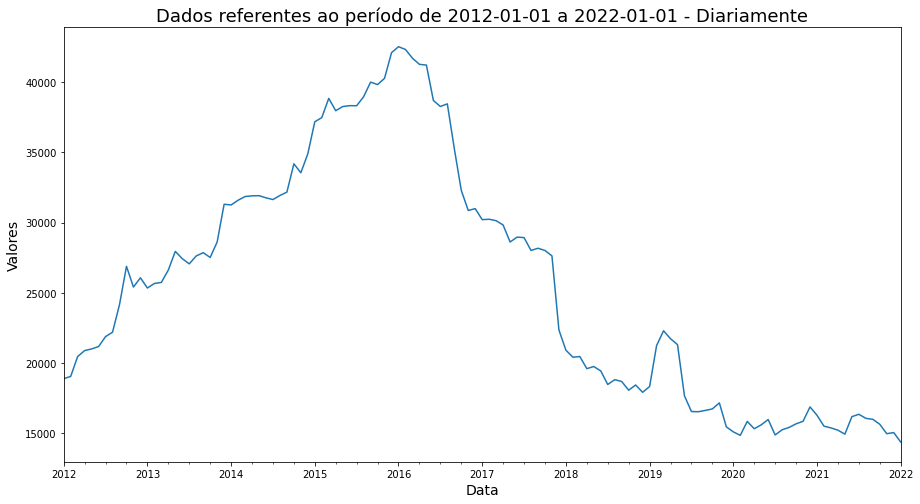

In [106]:
import matplotlib.pyplot as plt

dt_min = dados.index.date.min().isoformat() # Capturando os valores mínimos da Série Temporal
dt_max = dados.index.date.max().isoformat() # Capturando os valores Máximo da Série Temporal

dados.plot(figsize=(15,8), legend=None)
plt.title(f"Dados referentes ao período de {dt_min} a {dt_max} - Diariamente", fontsize=18)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.show()

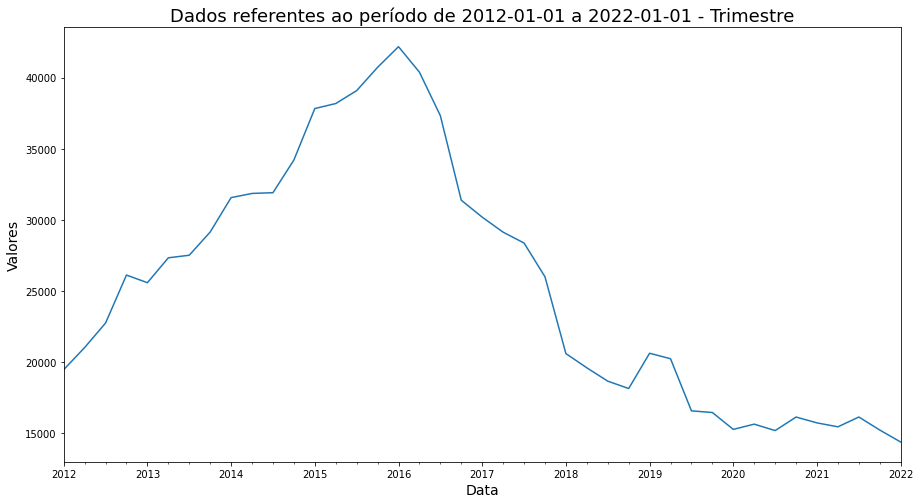

In [107]:
# Alterando a Frequência de diária para Mensal. Dessa forma, vamos ver como fica.
dados_trim = dados.reset_index().resample('Q', on='data')['valor'].mean()
dados_trim.plot(figsize=(15,8), legend=None)
plt.title(f"Dados referentes ao período de {dt_min} a {dt_max} - Trimestre", fontsize=18)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.show()

<p align="justify"> Vamos aplicar os Gráficos de Autocorrelação para termos uma idéia dos intervals razoáveis do modelo.</p>

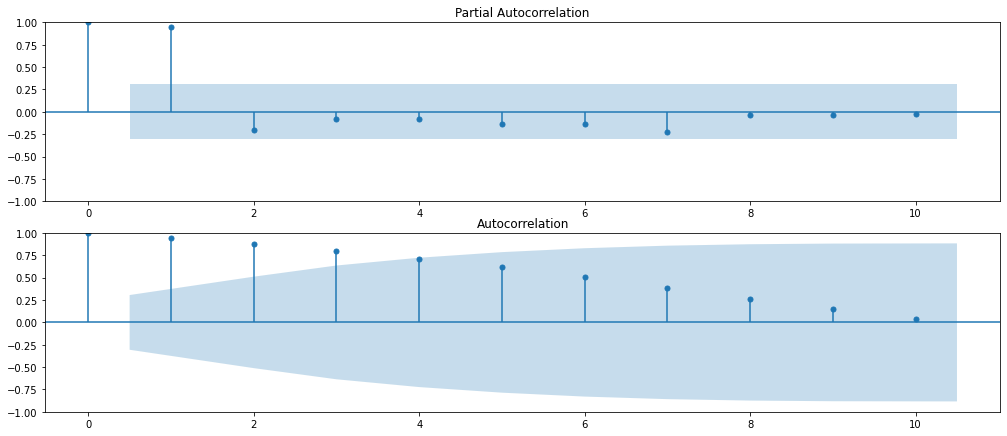

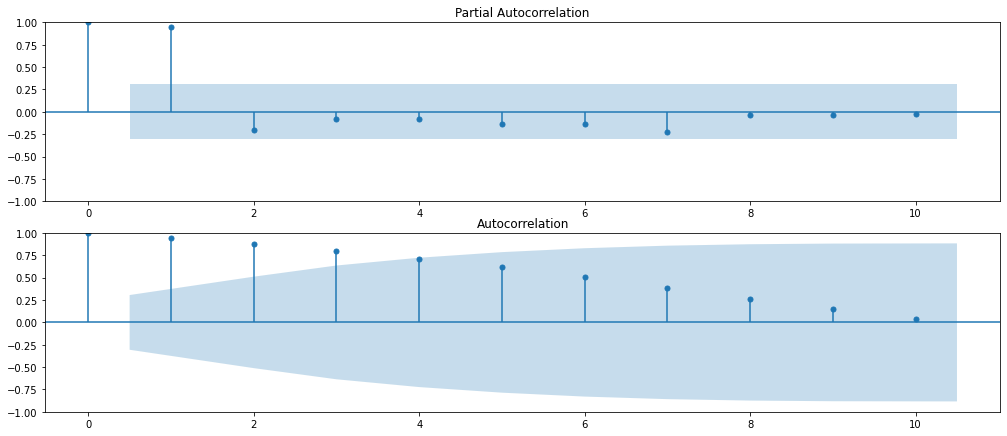

In [108]:
import statsmodels.api as sm
fig, axs = plt.subplots(2, figsize=(14,6))

fig.tight_layout()
sm.graphics.tsa.plot_pacf(dados_trim, lags=10, ax=axs[0], method='ywm')
sm.graphics.tsa.plot_acf(dados_trim, lags=10, ax=axs[1])

<p align="justify">Os gráficos acima apresentam uma correlação da Série Temporal consigo mesma, em defasagens (lags) de até 10 passos. Os valores de R ou <i>p</i> próximos de 0 significam que as observações consecutivas nas defasagens não são correlacionadas entre si. Os valores 1 e -1 indicam que existe uma forte correlação positiva ou negativa entre essas observações em relação às defasagens.</p>
<p align="justify">Tanto a autocorrelação quanto a autocorrelação partial retornam intervalos de confiança. A correlação é significativa se for além do intervalo de confiança (sombras azuis). Podemos ver que a autocorrelação é apresenta-se pouco significativa, mas a significância ela cai à medida que a defasagem aumenta.</p>

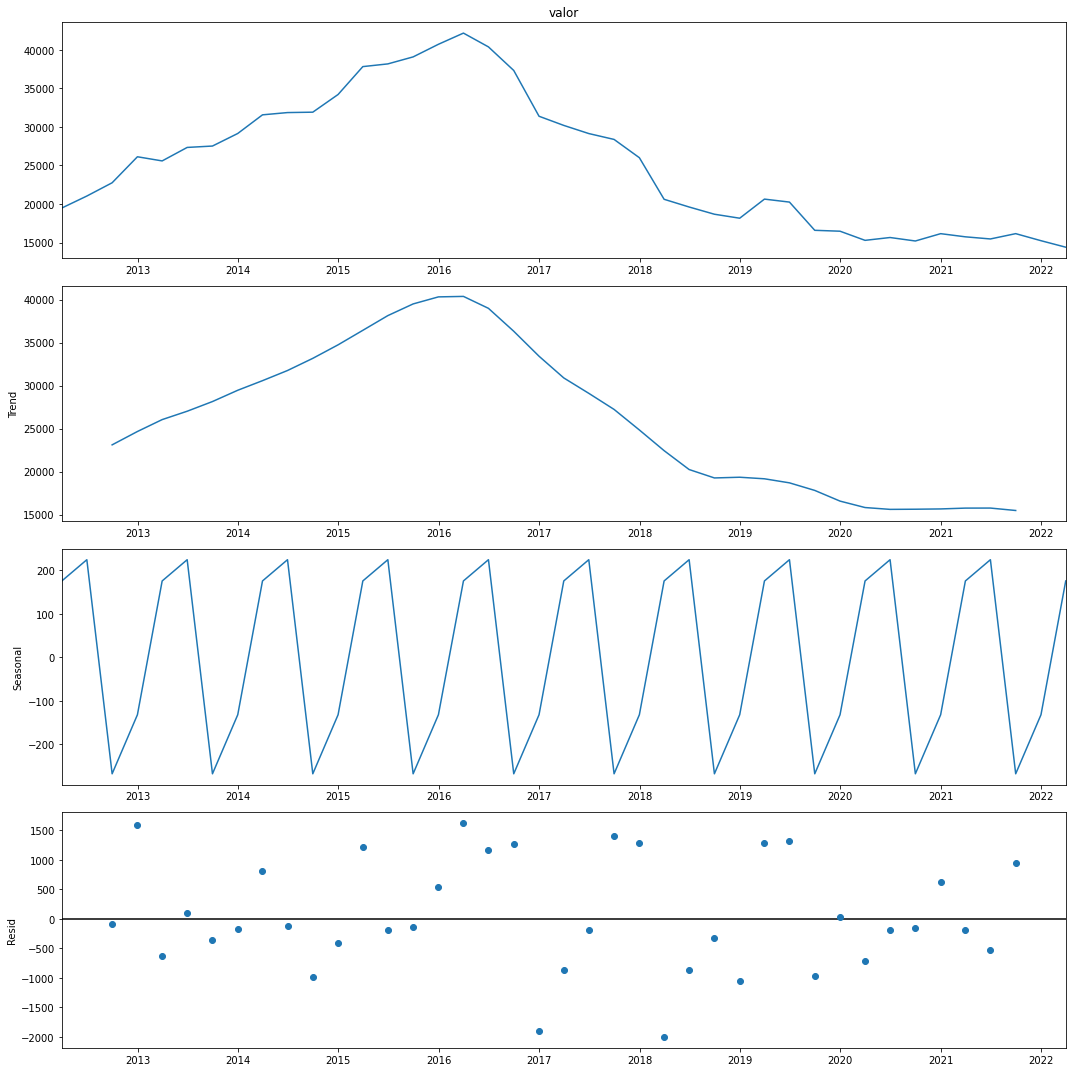

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dados_trim, model='additive', period=4)
result.plot()
plt.gcf().set_size_inches(15, 15)
plt.tight_layout()
plt.show()

<p align="justify">O primeiro subplot é a série original, que foi importada para dentro do conjunto. Nesta plotagem estão presentes a tendência e a sazonalidade, que foram nos subplot seguintes separados em Tendência e Sazonalidade. Para aplicar as técnicas adequadas a esse conjunto de dados, nós precisamos estabelecer a estacionaridade, para isso, precisamos remover os componentes da sazonalidade e  tendência. Antes disso, vamos utilizar o Coeficiente de Dickey-Fuller e o teste de KPSS para checar a estacionariedade</p>

In [110]:
from arch.unitroot import KPSS,ADF
ADF(dados_trim)

Test Statistic,-0.827
P-value,0.811
Lags,1


In [111]:
KPSS(dados_trim)

Test Statistic,0.489
P-value,0.042
Lags,4


<p align="justify">Como pode ser constatado a própria função já apresenta um parecer que o conjunto de dados é FRACAMENTE ESTACIONÁRIO, ou seja, nós teremos que lidar com isso se quisermos aplicar os algoritmos. Vamos utilizar a biblioteca <i>pmdarima</i> para encontrar bons valores de diferenciação.</p>

In [112]:
from pmdarima.arima.utils import ndiffs
adf = ndiffs(dados_trim, test="adf")
kpss = ndiffs(dados_trim, test='kpss')
pp = ndiffs(dados_trim, test='pp')

print(f"A primeira diferença relativa à ADF:   {adf}\n")
print(f"A primeira diferença relativa à KPSS:  {kpss}\n")
print(f"A primeira diferença relativa à pp:    {pp}\n")

A primeira diferença relativa à ADF:   2

A primeira diferença relativa à KPSS:  1

A primeira diferença relativa à pp:    1



<p align='justify'>Os valores nos testes oscilaram entre 1 e 2. Vamos começar utilizando o Valor 1. Começaremos com um modelos autoregressivo. Lembrando que o Modelo ARIMA possui os seguintes parâmentros: <i>p, d, q</i>. O parâmentro <i>p</i> é relacionado ao modelo Autoregressivo(AR), o parâmetro <i>d</i> é relacionado à integração e o parâmentro <i>q</i> é relacionado à Média Móvel. Portando, ARIMA(p,d,0) é AR(p) com parâmetro <i>order</i> d.</p>


In [113]:
mod = sm.tsa.arima.ARIMA(endog=dados_trim, order=(1, 0, 0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                   41
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -371.657
Date:                Wed, 16 Mar 2022   AIC                            749.315
Time:                        23:45:32   BIC                            754.455
Sample:                    03-31-2012   HQIC                           751.187
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.535e+04   1.05e+04      2.417      0.016    4794.328    4.59e+04
ar.L1          0.9724      0.044     22.137      0.000       0.886       1.058
sigma2      4.117e+06   8.14e+05      5.059      0.0

<p align="justify">Como nós sabemos que precisamos de uma diferenciação de grau 1, podemos definir o <i>d</i> como 1. Agora, iremos utilizar o <i>STLForecast</i> para remover a sazonalidade, pois o ARIMA não pode lidar com a sazonalidade de imediato. Observe que foi necessário definir o parâmetro trend="t" para que o modelo inclua uma constante. Caso contrário, teríamos uma regressão espúria, ou seja, os resultados parecem consistentes, porém, após análises adicionais parecem suspeitos. As duas variáveis não-estacionárias podem parecer que estejam relacionadas apenas por possuírem propriedades temporais semelhantes.</p>

In [114]:
from statsmodels.tsa.forecasting.stl import STLForecast
mod = STLForecast(
	dados_trim, sm.tsa.arima.ARIMA,
	model_kwargs=dict(order=(1,1,0), trend='t')
)
res = mod.fit().model_result
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -353.759
Date:                Wed, 16 Mar 2022   AIC                            713.518
Time:                        23:45:33   BIC                            718.585
Sample:                    03-31-2012   HQIC                           715.350
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -181.1372    444.492     -0.408      0.684   -1052.325     690.050
ar.L1          0.2761      0.072      3.831      0.000       0.135       0.417
sigma2      2.727e+06   6.24e+05      4.367      0.0

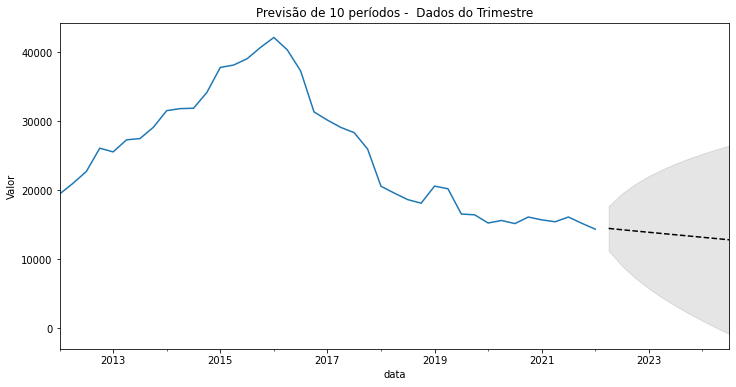

In [115]:
# Previsão

steps = 10
forecasts_df = res.get_forecast(steps=steps).summary_frame()

# Preparando a visualização
ax = dados_trim.plot(figsize=(12, 6))
plt.ylabel('Valor')
forecasts_df['mean'].plot(style='k--')
ax.fill_between(
    forecasts_df.index,
    forecasts_df['mean_ci_lower'],
    forecasts_df['mean_ci_upper'],
    color='k',
    alpha=0.1
)
plt.title(f'Previsão de {steps} períodos -  Dados do Trimestre')
plt.show()

<p align="justify">A linha sólida são os dados que possuímos e conhecemos, a linha pontilhada representa a nossa previsão para 10 trimestres no futuro. A área cinza ao redor da previsão representa o intervalo de confiança de 95%.</p>

In [121]:
# Capturando as previsões e os dados da Série
forecasts = []
qs = []
for q in range(0, 40, 10):
    mod = STLForecast(dados_trim, sm.tsa.arima.ARIMA, model_kwargs=dict(order=(0, 1, q), trend="t"))
    res = mod.fit().model_result
    print(f"aic ({q}): {res.aic}")
    forecasts.append(
        res.get_forecast(steps=steps).summary_frame()['mean']
    )
    qs.append(q)

forecasts_df = pd.concat(forecasts, axis=1)
forecasts_df.columns = qs

aic (0): 720.451857788534
aic (10): nan


c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\stat

aic (20): 731.313566236786
aic (30): 736.0855975831024


c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


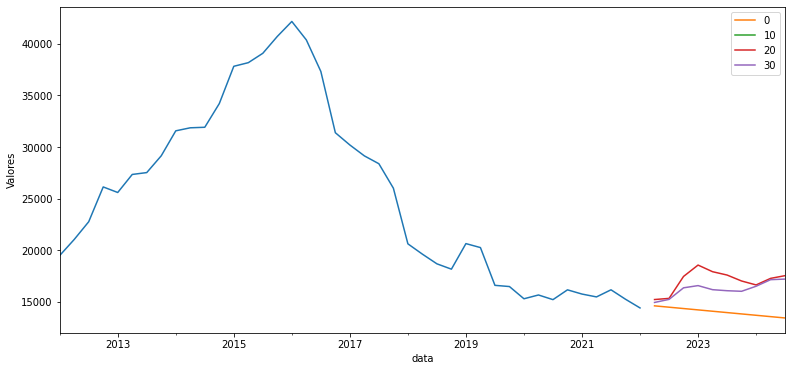

In [122]:
plt.figure(figsize=(13,6))
ax = dados_trim.plot()
plt.ylabel("Valores")
forecasts_df.plot(ax=ax)
plt.show()

<p align="justify"> O valor mais baixo de AIC representa o melhor modelo. Nós tentamos com 3 valores diferentes, neste caso deveríamos escolher o valor de q=10. A biblioteca <i>pmdarima</i> possui funcionalidade para encontrar os melhores parâmetros, e a biblioteca <i>SKTime</i> fornece uma implementação para a descoberta da ordem ótima de um modelo ARIMA: <i>AutoARIMA</i>.</p>

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    valor   No. Observations:                   41
Model:             ExponentialSmoothing   SSE                      144737422.651
Optimized:                         True   AIC                            626.151
Trend:                         Additive   BIC                            633.006
Seasonal:                          None   AICC                           628.622
Seasonal Periods:                  None   Date:                 Wed, 16 Mar 2022
Box-Cox:                           True   Time:                         23:47:14
Box-Cox Coeff.:                -0.15025                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            0.21518

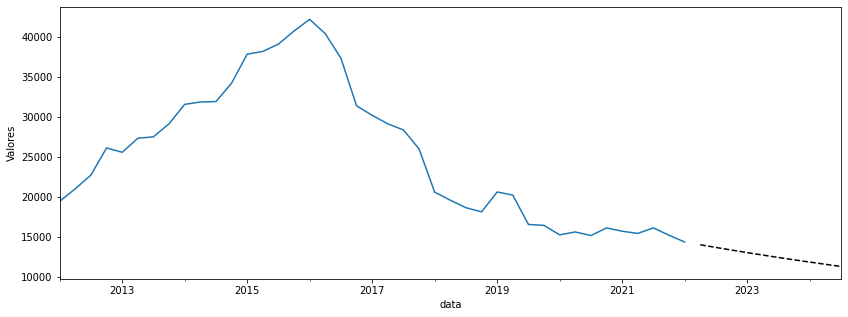

In [123]:
# Utilizando o Modelo Exponencial
mod = sm.tsa.ExponentialSmoothing(
    endog=dados_trim, trend='add', use_boxcox=True,
)
res = mod.fit()
print(res.summary())

forecasts = pd.Series(res.forecast(steps=steps))

ax = dados_trim.plot(figsize=(14,5))
plt.ylabel('Valores')
forecasts.plot(style='k--')
plt.show()

<p align="justify">Vamos observar os erros! Para isso, nós iremos dividir nosso dataset em Treinamento e Teste.</p>


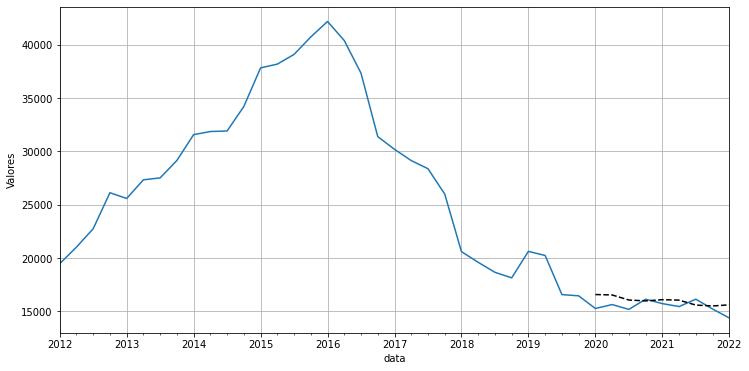

In [125]:
# Utilizando o Modelo ThetaModel
from statsmodels.tsa.forecasting.theta import ThetaModel
train_length = int(len(dados_trim) * 0.8)
tm = ThetaModel(dados_trim[:train_length], method="auto",deseasonalize=True)

res = tm.fit()
forecasts = res.forecast(steps=len(dados_trim)-train_length)
ax = dados_trim.plot(figsize=(12, 6))
plt.ylabel('Valores')
forecasts.plot(style='k--')
plt.grid(True)
plt.show()

<p align="justify"> A linha pontilhada é a previsão. Não ficou muito claro que tivemos um sucesso satisfatório no comportamento da Série Temporal. É importante quantiticar, caso a visualização deixe dúvidas!</p>

In [120]:
from sklearn import metrics
metrics.mean_squared_error(forecasts, dados_trim[train_length:], squared=False)

796.361124051248

<p align='justify'>O modelo que tiver o menor erro, normalmente é melhor. Entretanto, devemos observar o fator simplicidade e parcimônia na hora de avaliar e validar os dados.</p>